# A Customer Churn Prediction
#### `Project Scenario`
Every company wants to increase its profit or revenue margin and customer retention is one key area industry players focus their resources. In today's world of machine learning, most companies build classification models to perform churn analysis on their customers. 

Classification in machine learning and statistics entails a supervised learning approach where the computer program learns from provided data to make new observations or classifications. The primary objective is to determine the class or category into which new data points will fall. In this project scenario, an elaborate analysis will be conducted to train at least four models for predicting customer churn in a telecom company. This analysis will adhere to the **CRISP-DM framework**, ensuring a structured and systematic approach to model development and evaluation.

##### In this project I will be using the CRISP-DM Frame work for analysis
## `Business Understanding`

***Objective:***

The primary objective of this project is to develop a classification model for churn analysis to aid in customer retention efforts. Churn analysis focuses on predicting whether customers are likely to leave or continue their relationship with the company. By identifying customers at risk of churning, the company can take proactive measures to retain them, thus increasing revenue and profit margins.

***Background:***

In today's competitive b**usiness landscape, customer retention is paramount for sustaining profitability and growth. Retaining existing customers is often more cost-effective than acquiring new ones. Churn analysis leverages machine learning and statistical techniques to predict customer behavior and identify potential churners before they defect to competitors.

***Data Description:***

The project will utilize historical data encompassing various customer attributes, transactional details, and behavioral patterns. These may include demographic information, purchase history, engagement metrics, customer service interactions, and any other relevant data points. The dataset will be sufficiently large and diverse to capture the complexities of customer behavior across different segments.

***Methodology:***

The project will employ a supervised learning approach, specifically classification algorithms, to train predictive models. These models will learn from past instances of churn and non-churn events to classify new customers accordingly. Various classification algorithms such as logistic regression, decision trees, random forests, and gradient boosting will be explored to identify the most effective model for the given dataset.

***Key Deliverables:***

1. Churn Prediction Model: A robust machine learning model capable of accurately predicting customer churn based on input features.
2. Feature Importance Analysis: Identification of the most influential factors driving churn, providing actionable insights for targeted retention strategies.
3. Model Evaluation: Rigorous evaluation of model performance using appropriate metrics such as accuracy, precision, recall, and F1-score. The model will be validated using techniques like cross-validation and holdout validation to ensure generalizability.
4. Deployment Strategy: Recommendations for integrating the churn prediction model into the company's existing systems or workflows for real-time monitoring and intervention.

***Expected Outcomes:***

By leveraging the insights gained from the churn analysis model, the company expects to:

- Proactively identify customers at risk of churn.
- Tailor retention strategies and incentives to address specific customer needs and pain points.
- Optimize resource allocation by focusing retention efforts on high-value customers with the highest churn propensity.
- Ultimately, improve overall customer retention rates, thereby enhancing long-term profitability and competitiveness in the market.

***Conclusion:***

Churn analysis represents a strategic initiative aimed at leveraging data-driven insights to mitigate customer attrition and foster long-term loyalty. By harnessing the power of classification models, the company endeavors to enhance customer retention efforts, drive sustainable revenue growth, and maintain a competitive edge in the dynamic marketplace.

#### `Hypothesis`

**Null Hypothesis (Ho):** There is no significant difference in churn rates between customers with shorter and longer tenure.


**Alternative Hypothesis (Ha):** There is a significant difference in churn rates between customers with shorter and longer tenure.

#### `Business Questions`
1. What is the average tenure of customers who churned compared to those who stayed?
2. Do customers with partners or dependents have a lower churn rate?
3. How does the presence of multiple lines affect customer churn?
4. Is there a correlation between the contract term (Contract) and customer churn?
5. What are the common payment methods (Payment Method) among customers who churned?
6. How does the availability of tech-related services (e.g., OnlineSecurity, TechSupport) impact churn rates?
7. What percentage of customers who churned had streaming services (StreamingTV, StreamingMovies)?
8. Is there a difference in churn rates between senior citizens and non-senior citizens?

Importing Libraries

In [1]:
# Data Manipulation Packages:
from dotenv import dotenv_values
import pyodbc
import numpy as np
import pandas as pd
import re
from scipy.stats import mannwhitneyu, chi2_contingency, fisher_exact

# Machine Learning Packages:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Visualization Packages:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Utility Packages:
import warnings
warnings.filterwarnings('ignore')

print("🛬 Imported all packages.", "Warnings hidden. 👻")

🛬 Imported all packages. Warnings hidden. 👻


## `Data Understanding`
The data for this project is in differnt files and will be loaded into the notebook. The following describes the columns present in the data.

**Field** | **Description**
--- | ---
**Gender** | Whether the customer is male or female
**SeniorCitizen** | Whether a customer is a senior citizen or not
**Partner** | Whether the customer has a partner or not (Yes, No)
**Dependents** | Whether the customer has dependents or not (Yes, No)
**Tenure** | Number of months the customer has stayed with the company
**Phone Service** | Whether the customer has a phone service or not (Yes, No)
**MultipleLines** | Whether the customer has multiple lines or not
**InternetService** | Customer's internet service provider (DSL, Fiber Optic, No)
**OnlineSecurity** | Whether the customer has online security or not (Yes, No, No Internet)
**OnlineBackup** | Whether the customer has online backup or not (Yes, No, No Internet)
**DeviceProtection** | Whether the customer has device protection or not (Yes, No, No internet service)
**TechSupport** | Whether the customer has tech support or not (Yes, No, No internet)
**StreamingTV** | Whether the customer has streaming TV or not (Yes, No, No internet service)
**StreamingMovies** | Whether the customer has streaming movies or not (Yes, No, No Internet service)
**Contract** | The contract term of the customer (Month-to-Month, One year, Two year)
**PaperlessBilling** | Whether the customer has paperless billing or not (Yes, No)
**Payment Method** | The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))
**MonthlyCharges** | The amount charged to the customer monthly
**TotalCharges** | The total amount charged to the customer
**Churn** | Whether the customer churned or not (Yes or No)


#### `First Dataset`
I'm using Python's dotenv with a .env file to safely fetch the first dataset from a SQL database into my notebook. This keeps my database credentials private while allowing easy access to the data for analysis.

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [3]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.

connection = pyodbc.connect(connection_string)

In [5]:
# Sql query to get the 2020 data
query = "Select * FROM LP2_Telco_churn_first_3000"
First_Dataset = pd.read_sql(query, connection)

# Close the database connection
connection.close()

In [6]:
# Preview of the first Data set 
First_Dataset.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [7]:
# Looking at the summary information of the first dataset
First_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


#### `Second Dataset`
I obtained the second dataset from a GitHub repository, and I'll use Pandas to import the CSV file into my notebook for analysis.

In [8]:
# Loading the second dataset into the notebook
Second_Dataset = pd.read_csv(r"Data/LP2_Telco-churn-second-2000.csv")

In [9]:
# Preview of the second dataset
Second_Dataset.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


In [10]:
# Looking at the summary information of the second dataset
Second_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [11]:
# Checking if the first and second Dataset have the same column names for easy concatenation
# Get the column names from each DataFrame
columns_First_Dataset = set(First_Dataset.columns)
columns_Second_Dataset = set(Second_Dataset.columns)

# Check if all DataFrames have the same column names
if columns_First_Dataset == columns_Second_Dataset:
    print("All DataFrames have the same column names.")
else:
    print("Not all DataFrames have the same column names.")

All DataFrames have the same column names.


Concatenating the first and second Dataset to prepare them for analysis and training

In [12]:
# Concatenation of the datasets into a variable called train_df
train_df = pd.concat([First_Dataset, Second_Dataset], ignore_index=True)

In [13]:
# Preview of my train dataset
train_df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False


In [14]:
# Change all column names to lowercase
train_df.columns = train_df.columns.str.lower()

In [15]:
#Checking  for unique values in all the columns
cols= [ 'customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']


results = []

for i in cols:
    
    unique_values = train_df[i].unique()
    num_unique_values = train_df[i].nunique()
    
    
    results.append([i, unique_values, num_unique_values])


results_df = pd.DataFrame(results, columns=['Column', 'Unique_Values', 'Num_Unique_Values'])


results_df

,Column,Unique_Values,Num_Unique_Values
0,customerid,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",5043
1,gender,"[Female, Male]",2
2,seniorcitizen,"[0, 1]",2
3,partner,"[True, False, No, Yes]",4
4,dependents,"[False, True, No, Yes]",4
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
6,phoneservice,"[False, True, Yes, No]",4
7,multiplelines,"[None, False, True, No, No phone service, Yes]",5
8,internetservice,"[DSL, Fiber optic, No]",3
9,onlinesecurity,"[False, True, None, No, Yes, No internet service]",5


In [16]:
# Function replace None with Pandas NaN
def replace_none(value):
    like_nan = {'none', ''}
    if pd.isnull(value) or (isinstance(value, str) and (value.lower().strip() in like_nan)):
        value = pd.NA
    
    return value

# Apply the function to all columns
train_df = train_df.applymap(replace_none) # element-wise

In [17]:
train_df.isna().sum()

customerid            0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          8
churn                 1
dtype: int64

In [18]:
# Looking at the descriptive statistics of the numeric columns
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
monthlycharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


#### Data Cleaning

To ensure consistent and uniform data entry, I am standardizing certain columns by replacing all occurrences of False with No and all occurrences of True with Yes. This process helps maintain clarity and consistency in the data, making it easier to interpret and analyze.

In [19]:
# Define the mapping for standardization
standardize_mapping = {
    'No phone service': 'No',
    'No internet service': 'No',
    True: 'Yes',
    False: 'No',
}

# Columns to perform standardization
cols_to_standardize = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
                       'streamingtv', 'streamingmovies', 'paperlessbilling', 'churn',
                       'phoneservice', 'multiplelines', 'partner', 'dependents']

# Loop through columns for standardization
for col in cols_to_standardize:
    if train_df[col].dtype == 'object':
        train_df[col] = train_df[col].replace(standardize_mapping)


### Univariate Analysis:

In [20]:
numerical_columns = train_df.select_dtypes('number').columns
numerical_columns

Index(['seniorcitizen', 'tenure', 'monthlycharges'], dtype='object')

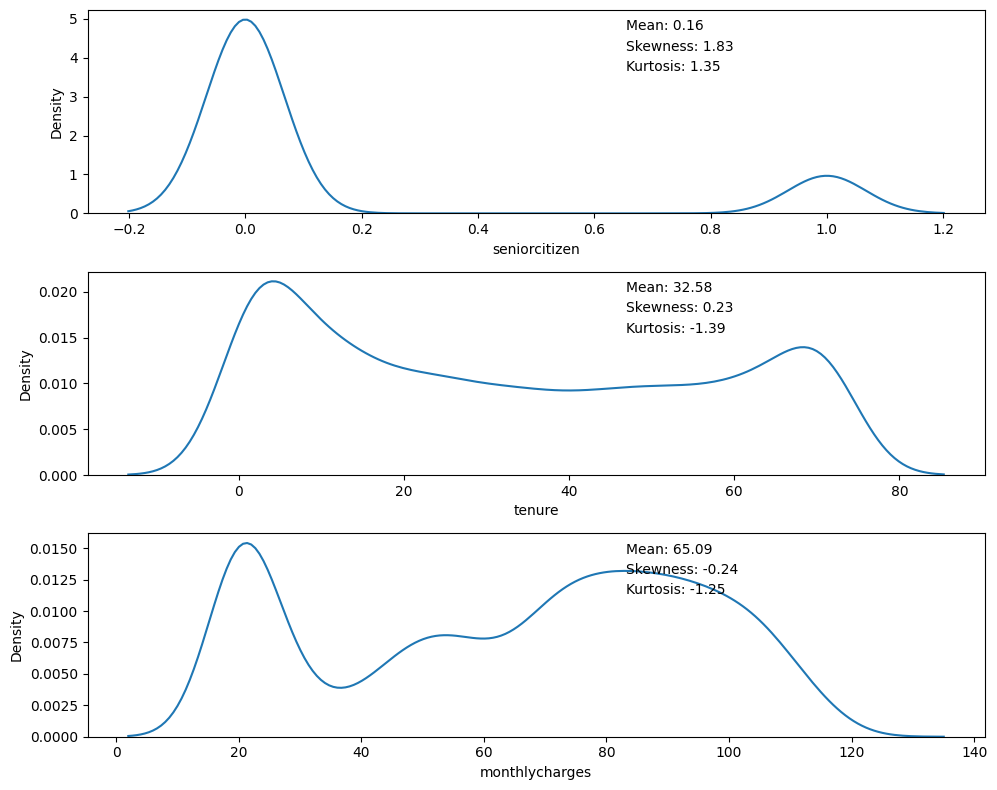

In [21]:
# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(10, 8))
for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=train_df, x=col, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
   
    # Calculate mean, skewness, and kurtosis
    mean_val = train_df[col].mean()
    skewness_val = train_df[col].skew()
    kurtosis_val = train_df[col].kurtosis()
   
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
   
plt.tight_layout()
plt.show()

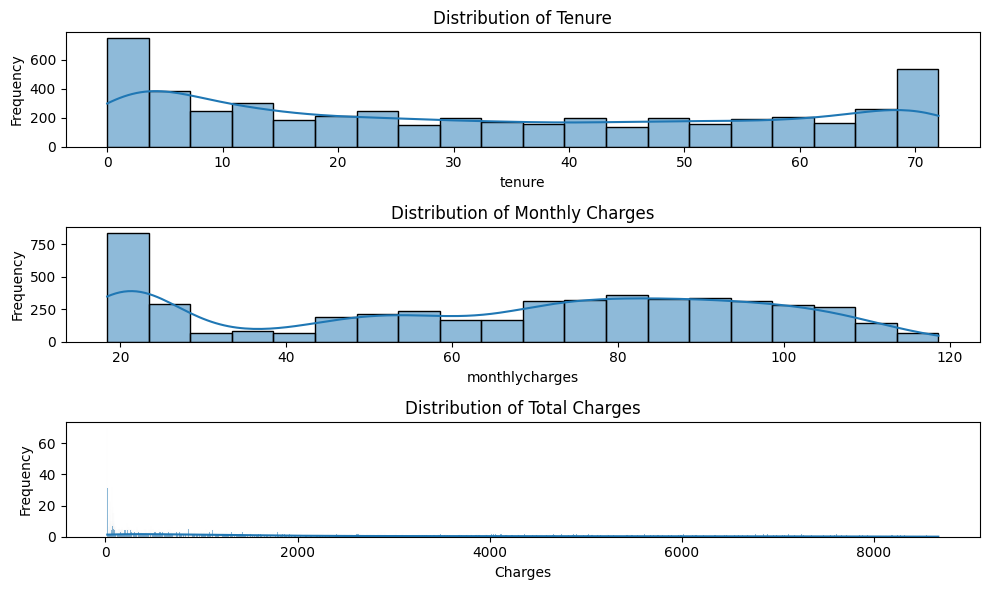

In [22]:
# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 6))

# Plot the distribution of tenure
sns.histplot(train_df['tenure'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Tenure')
axes[0].set_ylabel('Frequency')

# Plot the distribution of monthly charges
sns.histplot(train_df['monthlycharges'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Monthly Charges')
axes[1].set_ylabel('Frequency')

# Plot the distribution of total charges
sns.histplot(train_df['totalcharges'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Total Charges')
axes[2].set_xlabel('Charges')
axes[2].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Bivariate Analysis:


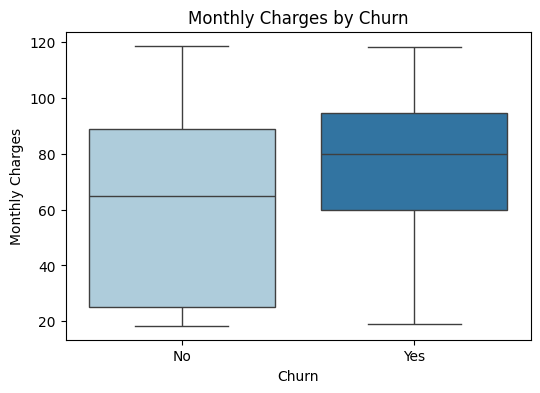

In [23]:
# Box plot of MonthlyCharges across Churn categories
plt.figure(figsize=(6, 4))
sns.boxplot(data=train_df, x='churn', y='monthlycharges', palette='Paired')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

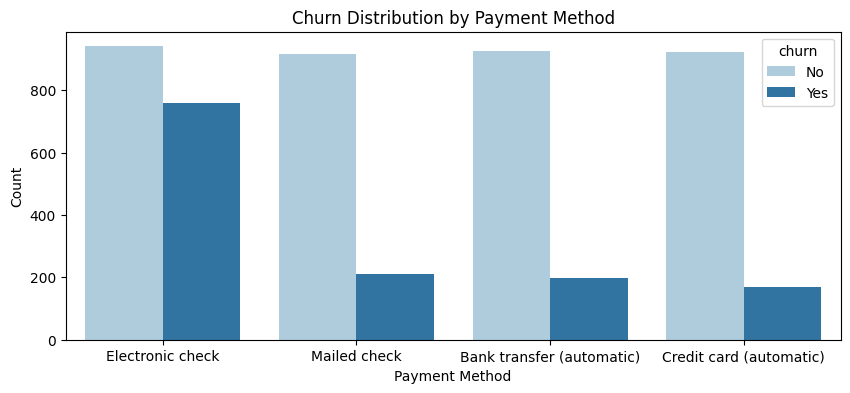

In [24]:
# Visualizing the relationship between paymentmethod and churn
plt.figure(figsize=(10, 4))
sns.countplot(data=train_df, x='paymentmethod', hue='churn', palette='Paired')
plt.title('Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

### Multivariate Analysis:

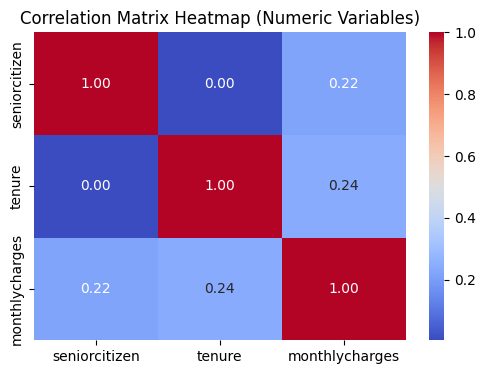

In [25]:
# Separate numeric and categorical columns
numeric_columns = train_df.select_dtypes(include=['number']).columns
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns

# Correlation Matrix and Heatmap for Numeric Variables
numeric_df = train_df[numeric_columns]
numeric_correlation_matrix = numeric_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Matrix Heatmap (Numeric Variables)')
plt.show()

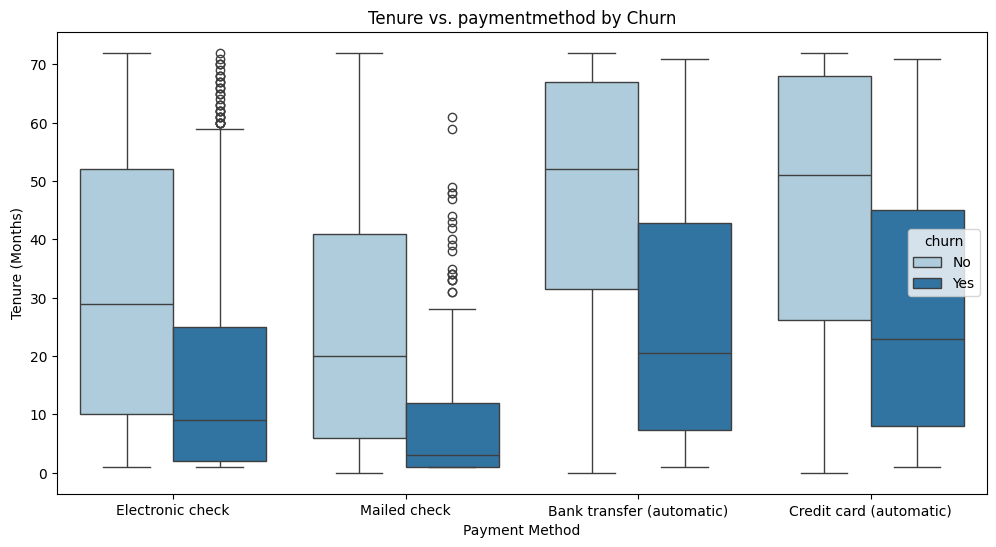

In [26]:
# Box plot of tenure vs. MonthlyCharges vs churn
plt.figure(figsize = (12, 6))
sns.boxplot(data = train_df, x ='paymentmethod', y ='tenure', hue ='churn', palette = 'Paired')
plt.title('Tenure vs. paymentmethod by Churn')
plt.xlabel('Payment Method')
plt.ylabel('Tenure (Months)')
plt.legend(title = 'churn')
plt.show()

Dropping the customerid column from our Data Frame as we will not need it for analysis

In [27]:
train_df.drop('customerid', axis=1,inplace =True)

#### **Answering Analytical Business Questions**

##### Question 1. What is the average tenure of customers who churned compared to those who stayed?

In [28]:
# Separate customers who churned from those who stayed
cust_churned = train_df[train_df['churn'] == 'Yes']
cust_not_churned = train_df[train_df['churn'] == 'No']

# Calculate the average tenure for each group
avg_tenure_churned = cust_churned['tenure'].mean()
avg_tenure_not_churned = cust_not_churned['tenure'].mean()

# Compare the average tenure of the two groups
print("Average tenure of churned customers:", avg_tenure_churned)
print("Average tenure of customers that stayed:", avg_tenure_not_churned)

Average tenure of churned customers: 18.24176646706587
Average tenure of customers that stayed: 37.73367512142472


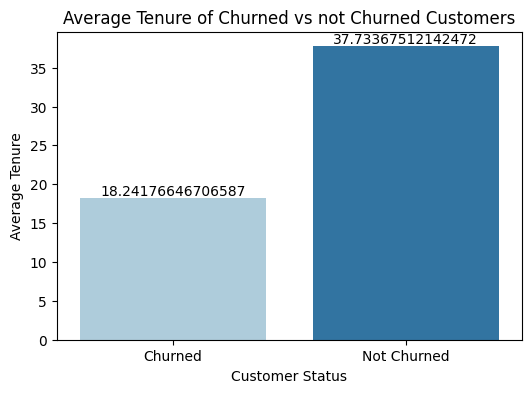

In [29]:
# Visualizing the comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=['Churned', 'Not Churned'], y=[avg_tenure_churned, avg_tenure_not_churned], palette = 'Paired')
plt.title('Average Tenure of Churned vs not Churned Customers')
plt.xlabel('Customer Status')
plt.ylabel('Average Tenure')

# Adding data labels
for index, value in enumerate([avg_tenure_churned, avg_tenure_not_churned]):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

##### Question 2. Do customers with partners or dependents have a lower churn rate?

In [30]:
# Calculate churn rate for customers with partners
partner_churn_rate = train_df[train_df['partner'] == 'Yes']['churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers without partners
no_partner_churn_rate = train_df[train_df['partner'] == 'No']['churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers with dependents
dependent_churn_rate = train_df[train_df['dependents'] == 'Yes']['churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers without dependents
no_dependent_churn_rate = train_df[train_df['dependents'] == 'No']['churn'].value_counts(normalize=True)['Yes']


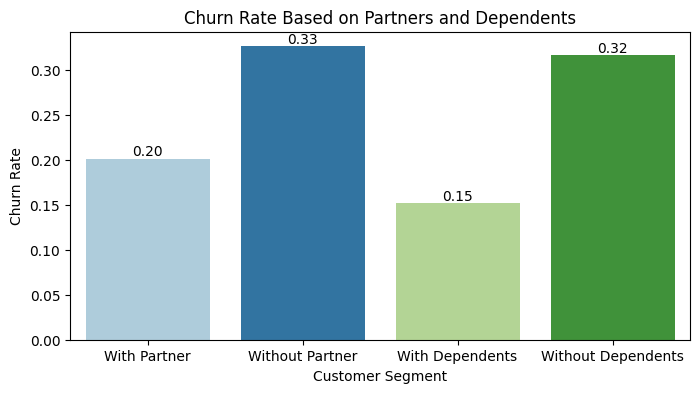

In [31]:
# Visualize the comparison
plt.figure(figsize=(8, 4))
sns.barplot(x=['With Partner', 'Without Partner', 'With Dependents', 'Without Dependents'], 
            y=[partner_churn_rate, no_partner_churn_rate, dependent_churn_rate, no_dependent_churn_rate], palette = 'Paired')
plt.title('Churn Rate Based on Partners and Dependents')
plt.xlabel('Customer Segment')
plt.ylabel('Churn Rate')

# Adding data labels
for index, value in enumerate([partner_churn_rate, no_partner_churn_rate, dependent_churn_rate, no_dependent_churn_rate]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

##### Question 3. How does the presence of multiple lines affect customer churn?

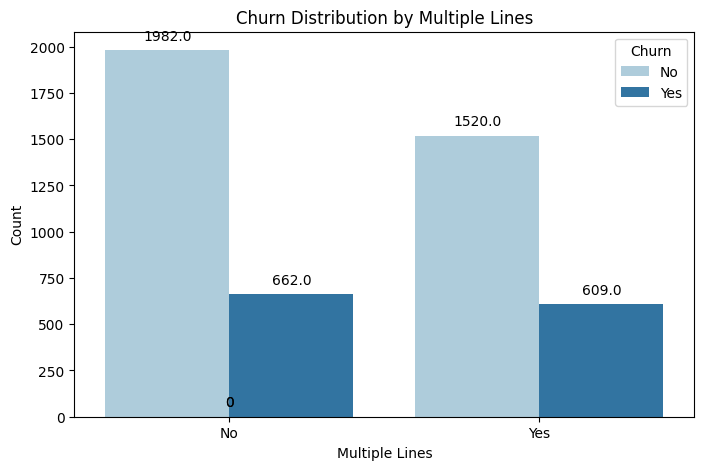

Churn Rate by Presence of Multiple Lines:
churn                No       Yes
multiplelines                    
No             0.749622  0.250378
Yes            0.713950  0.286050


In [32]:
# Plotting the relationship between multiple lines and churn
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=train_df, x='multiplelines', hue='churn', palette = 'Paired')

# Adding data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Churn Distribution by Multiple Lines')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Calculating churn rate by presence of multiple lines
churn_rate_multiple_lines = train_df.groupby('multiplelines')['churn'].value_counts(normalize=True).unstack()
print("Churn Rate by Presence of Multiple Lines:")
print(churn_rate_multiple_lines)

##### Question 4. Is there a correlation between the contract term (Contract) and customer churn?

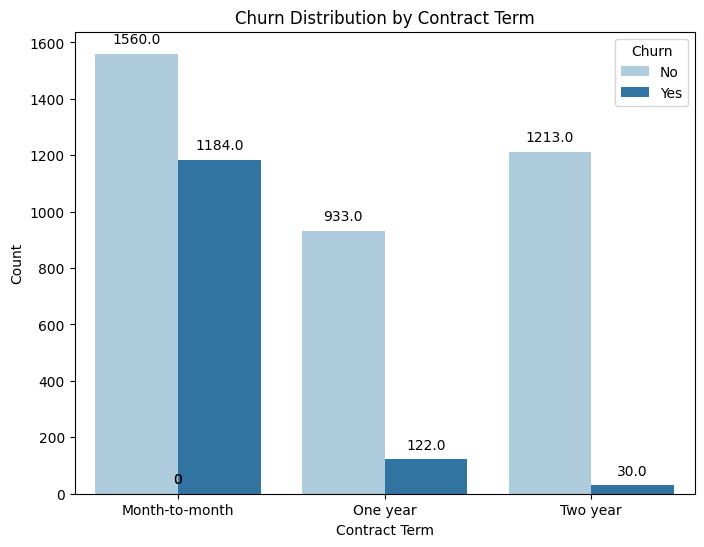


Churn Rate by Contract Term:
churn                 No       Yes
contract                          
Month-to-month  0.568513  0.431487
One year        0.884360  0.115640
Two year        0.975865  0.024135


In [33]:
# Plotting the relationship between contract term and churn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='contract', hue='churn', palette = 'Paired')

# Adding data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Churn Distribution by Contract Term')
plt.xlabel('Contract Term')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Calculating churn rate by contract term
churn_rate_contract = train_df.groupby('contract')['churn'].value_counts(normalize=True).unstack()
print("\nChurn Rate by Contract Term:")
print(churn_rate_contract)

Overall, these insights indicate that contract term is a significant predictor of customer churn, and it should be a key consideration in churn prediction models and retention strategies. Offering longer-term contracts may help reduce churn and improve customer retention rates.

##### Question 5. What are the common payment methods (Payment Method) among customers who churned?

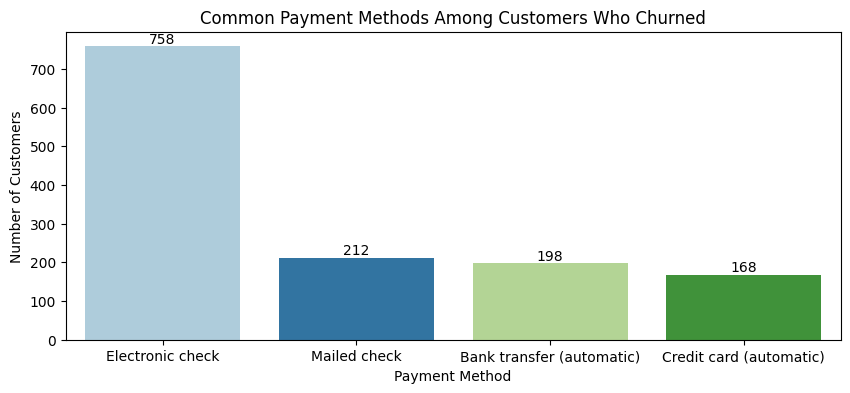

In [34]:
# Filter out the customers who churned
churned_customers = train_df[train_df['churn'] == 'Yes']

# Getting the number of people within the paymentmethod of the customers who churned
common_payment_methods = churned_customers['paymentmethod'].value_counts()

# Ploting the visualization using barplot
plt.figure(figsize=(10, 4))
barplot = sns.barplot(x=common_payment_methods.index, y=common_payment_methods.values, palette='Paired')

# Adding data labels to the bars
for index, value in enumerate(common_payment_methods.values):
    barplot.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Common Payment Methods Among Customers Who Churned')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.show()


##### Question 6. How does the availability of tech-related services (e.g., OnlineSecurity, TechSupport) impact churn rates?

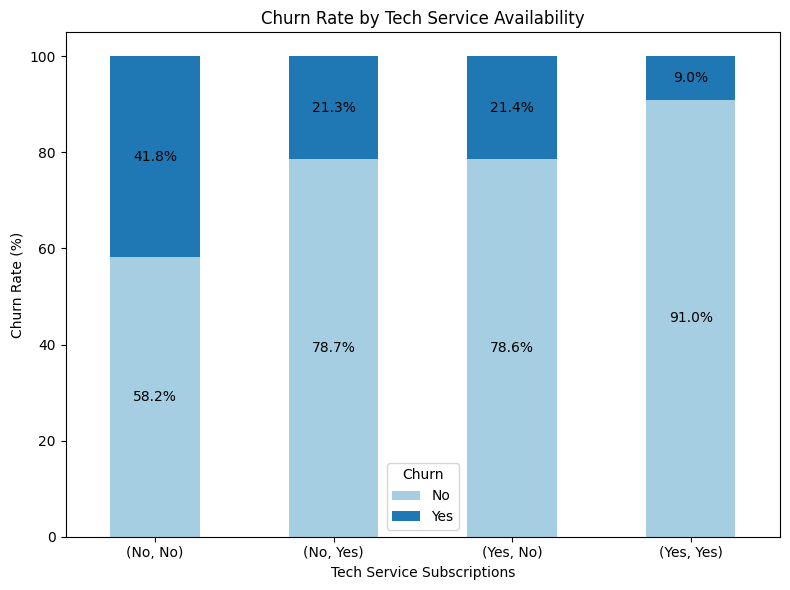

In [35]:
# Group data by subscription to tech services and churn
tech_service_groups = train_df.groupby(['onlinesecurity', 'techsupport', 'churn'])['gender'].count().unstack(fill_value=0)
 
# Calculate churn rate for each group
churn_rate = tech_service_groups.div(tech_service_groups.sum(axis=1), axis=0) * 100

# Define the 'Paired' color palette
colors = sns.color_palette('Paired')
 
# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
churn_rate.plot(kind='bar', stacked=True, color=colors[:2], ax=ax)
plt.xlabel('Tech Service Subscriptions')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tech Service Availability')
plt.xticks(rotation=0)
 
# Add percentage labels to bars
for i, (index, row) in enumerate(churn_rate.iterrows()):
    cum_value = 0
    for churn, value in row.items():
        ax.text(i, cum_value + value/2, f"{value:.1f}%", ha='center', va='center')
        cum_value += value
 
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()



- The chart suggests customers with no tech support are most likely to churn, while those with both security and support have the lowest churn rate.

##### Question 7. What percentage of customers who churned had streaming services (StreamingTV, StreamingMovies)?

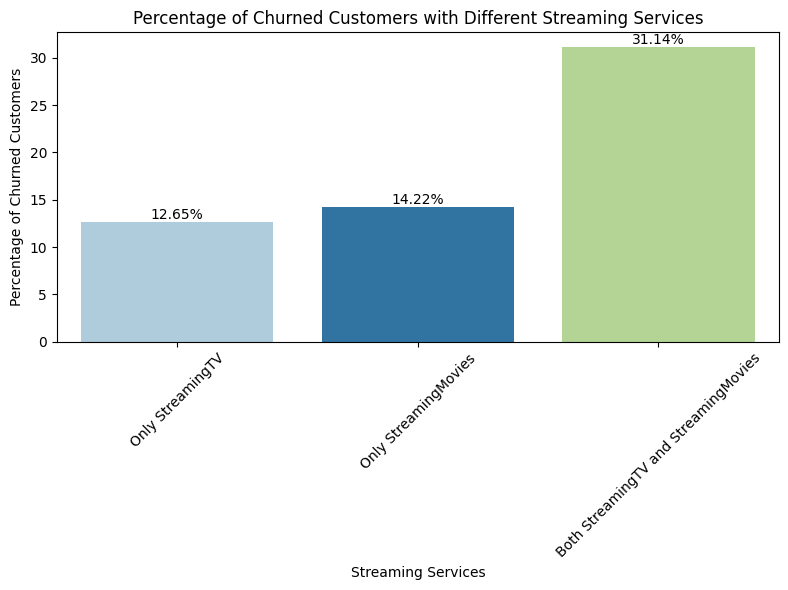

In [36]:
# Filter the DataFrame to include only churned customers
churned_customers = train_df[train_df['churn'] == 'Yes']
 
# Calculate the number of churned customers with different streaming services
streaming_tv_churned_count = len(churned_customers[(churned_customers['streamingtv'] == 'Yes') & (churned_customers['streamingmovies'] == 'No')])
streaming_movies_churned_count = len(churned_customers[(churned_customers['streamingtv'] == 'No') & (churned_customers['streamingmovies'] == 'Yes')])
both_streaming_churned_count = len(churned_customers[(churned_customers['streamingtv'] == 'Yes') & (churned_customers['streamingmovies'] == 'Yes')])
 
# Calculate the total number of churned customers
total_churned_customers = len(churned_customers)
 
# Calculate the percentage of churned customers for each category
percentage_streaming_tv_churned = (streaming_tv_churned_count / total_churned_customers) * 100
percentage_streaming_movies_churned = (streaming_movies_churned_count / total_churned_customers) * 100
percentage_both_streaming_churned = (both_streaming_churned_count / total_churned_customers) * 100
 
# Plotting the grouped bar plot
categories = ['Only StreamingTV', 'Only StreamingMovies', 'Both StreamingTV and StreamingMovies']
percentages = [percentage_streaming_tv_churned, percentage_streaming_movies_churned, percentage_both_streaming_churned]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=categories, y=percentages, palette='Paired')

# Add data labels on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.xlabel('Streaming Services')
plt.ylabel('Percentage of Churned Customers')
plt.title('Percentage of Churned Customers with Different Streaming Services')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Question 8. Is there a difference in churn rates between senior citizens and non-senior citizens?

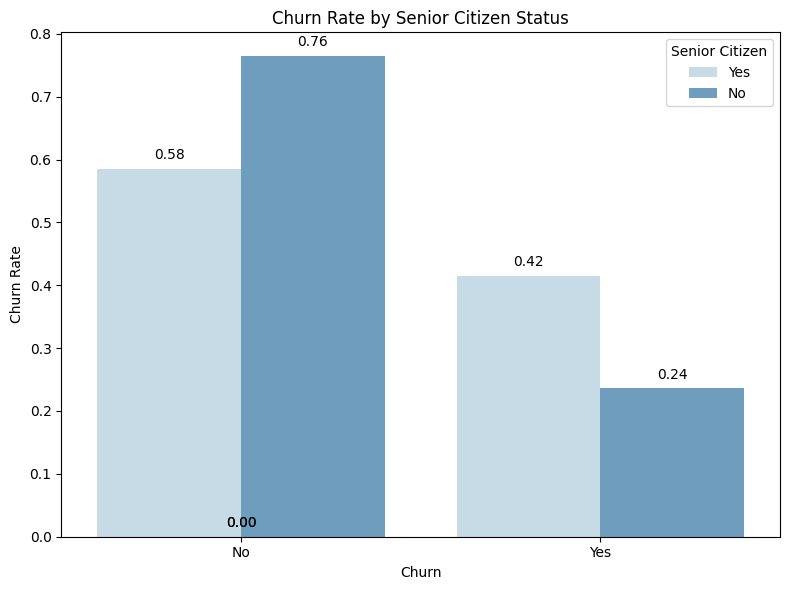

In [37]:
# Calculate churn rates for senior and non-senior citizens
senior_churn_rate = train_df[train_df['seniorcitizen'] == 1]['churn'].value_counts(normalize=True)
non_senior_churn_rate = train_df[train_df['seniorcitizen'] == 0]['churn'].value_counts(normalize=True)

# Convert churn rates dictionaries to DataFrames
senior_churn_rate_df = pd.DataFrame(list(senior_churn_rate.items()), columns=['Churn', 'Churn Rate'])
non_senior_churn_rate_df = pd.DataFrame(list(non_senior_churn_rate.items()), columns=['Churn', 'Churn Rate'])

# Add 'Senior Citizen' column to each DataFrame
senior_churn_rate_df['Senior Citizen'] = 'Yes'
non_senior_churn_rate_df['Senior Citizen'] = 'No'

# Concatenate the DataFrames vertically
combined_df = pd.concat([senior_churn_rate_df, non_senior_churn_rate_df], ignore_index=True)

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Churn', y='Churn Rate', hue='Senior Citizen', data=combined_df, palette='Paired', alpha=0.7)

# Adding data labels to each bar
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

add_labels(plt.gca())

plt.xlabel('Churn')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Senior Citizen Status')
plt.legend(title='Senior Citizen')
plt.tight_layout()
plt.show()

#### `Hypothesis Testing`

In [38]:
# Encode 'churn' column into numeric values
train_df['churn_numeric'] = train_df['churn'].replace({'Yes': 1, 'No': 0})

# Calculate the median value for tenure
median_tenure = train_df['tenure'].median()

# Divide the data into two categories
long_tenure = train_df[train_df['tenure'] >= median_tenure]['churn_numeric']
short_tenure = train_df[train_df['tenure'] < median_tenure]['churn_numeric']

# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact([[long_tenure.sum(), short_tenure.sum()],
                                    [len(long_tenure), len(short_tenure)]])

# Print the test statistic (odds ratio) and p-value
print("Odds ratio:", odds_ratio)
print("P-value:", p_value)

# State the significance level
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in churn rates between customers with shorter and longer tenure.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in churn rates between customers with shorter and longer tenure.")

Odds ratio: 0.33632517216350666
P-value: 2.8376888726914e-62
Reject Null Hypothesis: There is a significant difference in churn rates between customers with shorter and longer tenure.


#### `Analytical Key Insights`
1. I observed that many categorical columns contain values such as "NO," "Yes," "False," and "True." I updated all "True" values to "Yes" and all "False" values to "No."
2. I standardized the case of all columns in the DataFrame to lowercase letters for uniformity.
3. Customers with multiple lines tend to have a slightly higher churn rate compared to those without multiple lines.
4. The average tenure for customers who churned is 18.24 months, while for those who didn't churn, it is 37.73 months.
5. Many customers didn't have multiple lines, but when we look at the difference in churn with those who had multiple lines, their churn rate was relatively higher. However, it was not significant enough to influence churn behavior significantly.
6. Customers with month-to-month contracts have a significantly higher churn rate compared to others, and this significantly influences churn rates.
7. Customers using electronic checks have the highest churn rate compared to other payment methods, which is also a significant factor in churn rates.
8. Customers who have both streaming TV and streaming movies have a higher churn rate compared to those who only have streaming TV or streaming movies.
9. Senior citizens churn more than customers who are not senior citizens.
10. There hypothesis shows that there is no significant difference in churn rates between customers with shorter and longer tenure.

## `Data Preparation`

In [39]:
# saving the concated data into a csv file
train_df.to_csv('Data/train.csv')

In [40]:
# Loading my concated train data into the note book
train_df = pd.read_csv('Data/train.csv')

In [41]:
# Looking at the summary of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5043 non-null   int64  
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 


In [42]:
# Dropping the unnecessary columns
train_df.drop(columns=['churn_numeric', 'Unnamed: 0'], inplace =True)

In [43]:
# Looking at the summary of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   seniorcitizen     5043 non-null   int64  
 2   partner           5043 non-null   object 
 3   dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   phoneservice      5043 non-null   object 
 6   multiplelines     4774 non-null   object 
 7   internetservice   5043 non-null   object 
 8   onlinesecurity    4392 non-null   object 
 9   onlinebackup      4392 non-null   object 
 10  deviceprotection  4392 non-null   object 
 11  techsupport       4392 non-null   object 
 12  streamingtv       4392 non-null   object 
 13  streamingmovies   4392 non-null   object 
 14  contract          5043 non-null   object 
 15  paperlessbilling  5043 non-null   object 
 16  paymentmethod     5043 non-null   object 


In [44]:
# Dropping the null value in the churn column to avoid data leakage
train_df.dropna(subset=['churn'], inplace=True)

I'm checking the balance of our training dataset using the target column 'churn' by calculating the ratio between customers who churn and those who don't churn.

In [45]:
# Checking the distribution of my churn column
churn_dist = train_df['churn'].value_counts().rename('total').reset_index()
churn_dist

,churn,total
0,No,3706
1,Yes,1336


In [46]:
# Adding a column to find the ratio of the churn
churn_dist['ratio'] = churn_dist['total'].apply(lambda X: round(X/churn_dist['total'].sum()*100),2)
churn_dist

,churn,total,ratio
0,No,3706,74
1,Yes,1336,26


Spliting the train dataset into training and evaluation datasets

- X = Input data
- y = label/target

In [47]:
# Seperating the data into X and y variables
X = train_df.drop('churn', axis =1)
y = train_df[['churn']]

# Using the train_test_split to split my data into train and evaluation datasets
X_train, X_eval, y_train, y_eval =  train_test_split(X, y, train_size=0.8, random_state=0, stratify=y)

Encoding my traget column using label encoder

In [48]:
# Instatiate my encoder
encoder = LabelEncoder()

# Fitting and transforming the y data
y_train_encoded = encoder.fit_transform(y_train)
y_eval_encoded = encoder.transform(y_eval)

#### **Preparing the Pipelines**

In [49]:
# Getting the numerical columns
numerical_columns = X.select_dtypes('number').columns

# Getting the categorical columns
categorical_columns = X.select_dtypes('object').columns

In [50]:
# Setting my numeric pipeline
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy = 'median')),
    ('num_scaler', StandardScaler())
])

# Setting my categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat-encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Using my column transformer to transform my pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

## `Modeling`

In [51]:
# Instantiate models
models =[
    ('Decision_tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic_reg', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('random_forest', RandomForestClassifier(random_state = 42)),
    ('XGBoost', XGBClassifier(random_state = 42)),
    ('AdaBoost', AdaBoostClassifier(random_state = 42))
    
]

# Creating dictionary for the models
all_pipelines = {}

# Create an empty DataFrame for metrics
metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Loop over models and create pipelines, fit models, and calculate metrics
for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on training data
    final_pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the evaluation dataset
    y_pred = final_pipeline.predict(X_eval)

    all_pipelines[model_name] = final_pipeline
    
    # Calculate classification report metrics
    metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Extract metrics for the current model
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Add metrics to metrics_table
    metrics_table.loc[len(metrics_table)] = [model_name, accuracy, precision, recall, f1_score]

# Display the metrics table
metrics_table.sort_values(ascending=False, by='f1_score')


,model_name,accuracy,precision,recall,f1_score
1,Logistic_reg,0.814668,0.806754,0.814668,0.808570
4,XGBoost,0.799802,0.791479,0.799802,0.794012
3,random_forest,0.799802,0.788709,0.799802,0.790310
5,AdaBoost,0.795837,0.786324,0.795837,0.788954
2,knn,0.772052,0.765913,0.772052,0.768502
0,Decision_tree,0.722498,0.731383,0.722498,0.726465


##### Observations
Based on the f1 score of the models, Logistic regresion is the best performing model. I chose f1 score instead of accuracy because accuracy is not a good metric for imbalanced data.

#### Training the Models on a Balanced Data Set using SMOTE

In [52]:
balanced_data_models =[
    ('Decision_tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic_reg', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('random_forest', RandomForestClassifier(random_state = 42)),
    ('XGBoost', XGBClassifier(random_state = 42)),
    ('AdaBoost', AdaBoostClassifier(random_state = 42))
]

# Creating dictionary for the models
balanced_data_all_pipelines = {}

# Create an empty DataFrame for metrics
balanced_data_metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Loop over models and create pipelines, fit models, and calculate metrics
for model_name, classifier in models:
    balanced_data_final_pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote_sampler', SMOTE(random_state =42)),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on training data
    balanced_data_final_pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the evaluation dataset
    y_pred = balanced_data_final_pipeline.predict(X_eval)
    
    # Calculate classification report metrics
    balanced_data_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)

    # Add all pipelines into balanced_data_all_pipelines
    balanced_data_all_pipelines[model_name] = balanced_data_final_pipeline
    
    # Extract metrics for the current model
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Add metrics to metrics_table
    balanced_data_metrics_table.loc[len(balanced_data_metrics_table)] = [model_name, accuracy, precision, recall, f1_score]

# Display the metrics table
balanced_data_metrics_table.sort_values(ascending=False, by='f1_score')

,model_name,accuracy,precision,recall,f1_score
0,Decision_tree,0.795837,0.786324,0.795837,0.788954
1,Logistic_reg,0.795837,0.786324,0.795837,0.788954
2,knn,0.795837,0.786324,0.795837,0.788954
3,random_forest,0.795837,0.786324,0.795837,0.788954
4,XGBoost,0.795837,0.786324,0.795837,0.788954
5,AdaBoost,0.795837,0.786324,0.795837,0.788954


##### Observation
After balancing my data, I realised the models performed better when the data was not balanced so I will use the unbalced data scores for hyperparemeter tuning.

In [53]:
all_confusion_matrix = {}

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_eval_encoded, y_pred)

all_confusion_matrix[model_name] = conf_matrix

In [54]:
all_confusion_matrix

{'AdaBoost': array([[598, 144],
        [ 79, 188]], dtype=int64)}

<Axes: >

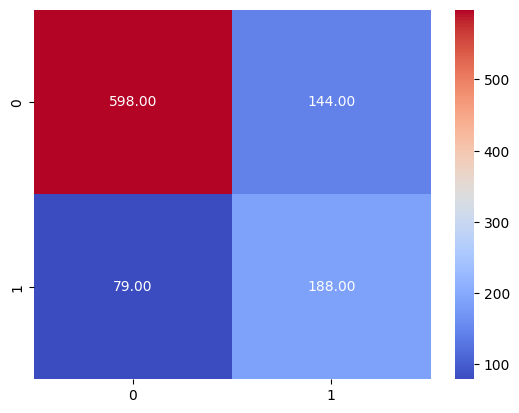

In [55]:
Ada_matrix = all_confusion_matrix['AdaBoost']
sns.heatmap(Ada_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')

#### Visualizing the ROC_AUC curve

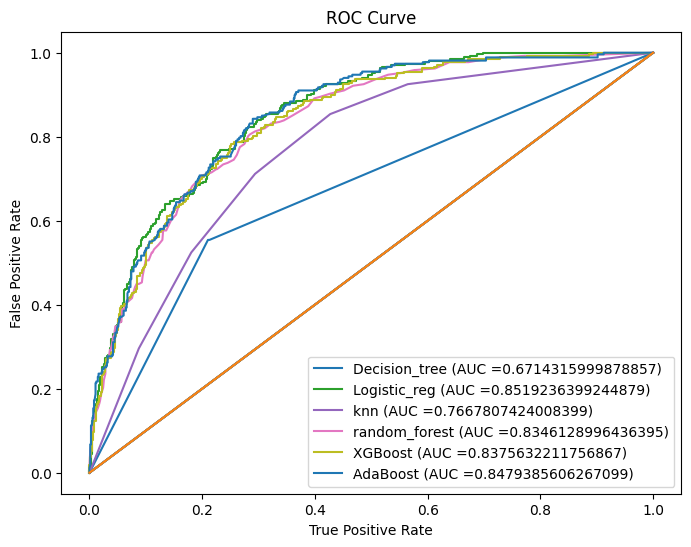

In [56]:
fig, ax = plt.subplots(figsize = (8,6))

# add confusion matrix to all pipelines
all_confusion_matrix = {}

all_roc_data = {}

for model_name, pipeline in all_pipelines.items():
    y_score = pipeline.predict_proba(X_eval)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_eval_encoded, y_score)

    roc_auc = auc(fpr, tpr)

    roc_data_df = pd.DataFrame({'False Positive rate': fpr, 'True Positive Rate': tpr, 'Thresholds': thresholds})

    all_roc_data[model_name] = roc_data_df

    ax.plot(fpr, tpr, label= f'{model_name} (AUC ={roc_auc})')

    ax.plot([0,1], [0,1])
    ax.set_ylabel('False Positive Rate')
    ax.set_xlabel('True Positive Rate')
    ax.set_title(f'ROC Curve') 

plt.legend() 
plt.show()   

In [57]:
log_pipeline = all_pipelines['Logistic_reg']

In [58]:
all_roc_data['Logistic_reg'].tail(50)

,False Positive rate,True Positive Rate,Thresholds
228,0.386792,0.898876,0.325117
229,0.392183,0.898876,0.318903
230,0.392183,0.902622,0.318560
231,0.397574,0.902622,0.310624
232,0.397574,0.910112,0.306678
233,0.402965,0.910112,0.303845
234,0.402965,0.913858,0.303817
235,0.408356,0.913858,0.295788
236,0.408356,0.917603,0.295407
237,0.415094,0.917603,0.286186


<Axes: >

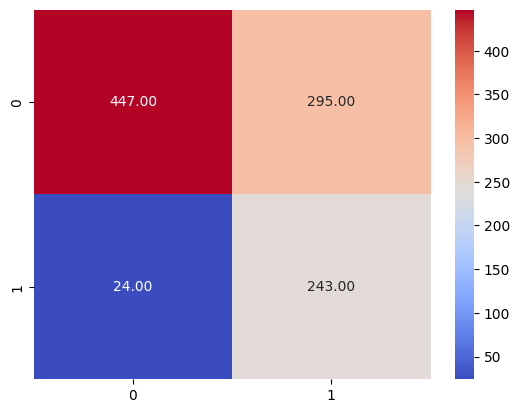

In [59]:
# Using a threshold of Logistic regression when the True positive rate is at 0.91 and the False Positive rate is at 0.39
threshold = 0.306678

y_pred_proba = log_pipeline.predict_proba(X_eval)[:,1]

binary_predictions = (y_pred_proba > threshold).astype(int)
threshold_matrix = confusion_matrix(y_eval_encoded, binary_predictions)

# plot heat map of threshold conf_matrix
sns.heatmap(threshold_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')

## `Hyperparameter Tuning`

In [60]:
# Setting my parameters
param_grids = {

    'Decision_tree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },

    'Logistic_reg': {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 50, 100],        
        'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'classifier__max_iter': [300, 200, 100]
    },

    'knn': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11]
    },

    'random_forest': {
        'classifier__n_estimators': [10, 50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30]
    }, 
    'XGBoost': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.3],
        'classifier__max_depth': [3, 5, 7]
    },
 
    'AdaBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1.0]
    }
    }


params = {}
search_histories = {}

# Using a for loop to iterate through the models and param_grids
for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(
        estimator = final_pipeline, 
        param_grid = param_grid, 
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
        scoring = ['f1_weighted', 'precision', 'recall'],
        refit = 'f1_weighted',
        verbose = 3, 
        n_jobs = -1
    )
    grid_search.fit(X_train, y_train_encoded)
    params[model_name] = grid_search
        
    search_history = pd.DataFrame(grid_search.cv_results_)        
    search_histories[model_name] = search_history

for model_name, grid_search in params.items():
    print(f'Best hyperparamters for {model_name}:{grid_search.best_params_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 126 candidates, totalling 630 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparamters for Decision_tree:{'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best hyperparamters for Logistic_reg:{'classifier__C': 100, 'classifier__max_iter': 300, 'classifier__solver': 'lbfgs'}
Best hyperparamters for knn:{'classifier__n_neighbors': 11}
Best hyperparamters for random_forest:{'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Best hyperparamters for XGBoost:{'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Best hyperparamters for AdaBoost:{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}


In [61]:
# Get the models with the best hyperparameters
def get_best_models(params):
    best_models = []
    for model_name, grid_search in params.items():
        best_model = grid_search.best_estimator_
        best_models.append((model_name, best_model))    
    
    return best_models
 
best_models = get_best_models(params)

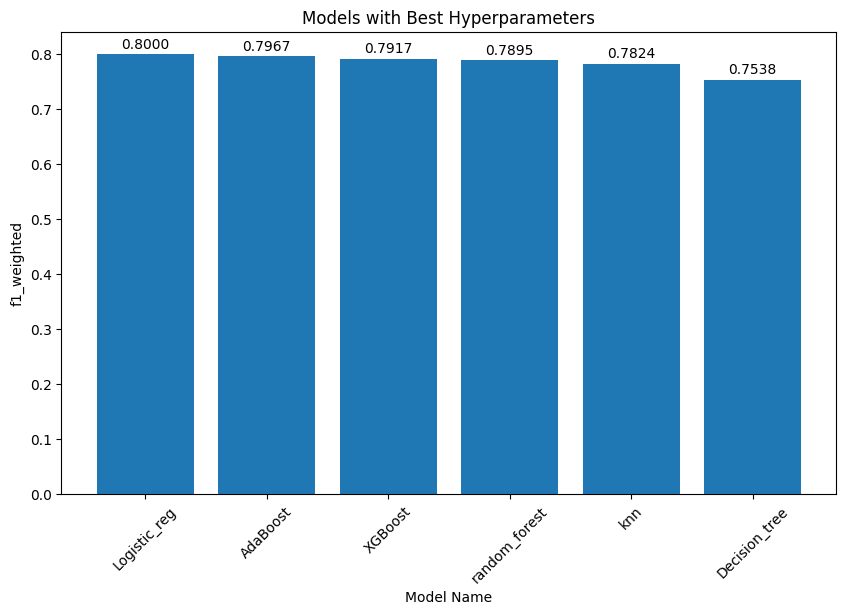

In [62]:
# Get models f1_weighted scores and names
model_names = [model_name for model_name in search_histories.keys()]
model_scores = [search_history['mean_test_f1_weighted'].max() for search_history in search_histories.values()]

# Create a DataFrame to for plot
df_models = pd.DataFrame({'model_name': model_names, 'f1_score': model_scores})
df_models = df_models.sort_values(by='f1_score', ascending=False)


# Create a bar chart
plt.figure(figsize=(10,6))
plt.bar(data=df_models, x='model_name', height='f1_score')

# Add text labels to the bars
for i, score in enumerate(df_models['f1_score']):
    plt.text(i, score+0.01, '{:1.4f}'.format(score), ha="center")

plt.xlabel('Model Name')
plt.ylabel('f1_weighted')
plt.title('Models with Best Hyperparameters')
plt.xticks(rotation=45)
plt.show()

In [63]:
metric_before_after_tuning_models = pd.merge(
    metrics_table[['model_name', 'f1_score']], 
    df_models, 
    on='model_name', 
    how='inner', 
    suffixes=('_before', '_after')
).sort_values(ascending=False, by='f1_score_after')

metric_before_after_tuning_models

,model_name,f1_score_before,f1_score_after
1,Logistic_reg,0.808570,0.799951
5,AdaBoost,0.788954,0.796729
4,XGBoost,0.794012,0.791690
3,random_forest,0.790310,0.789529
2,knn,0.768502,0.782383
0,Decision_tree,0.726465,0.753805


#### Visualize the models before and after hyperparameter tuning using f1 score (weighted) metric

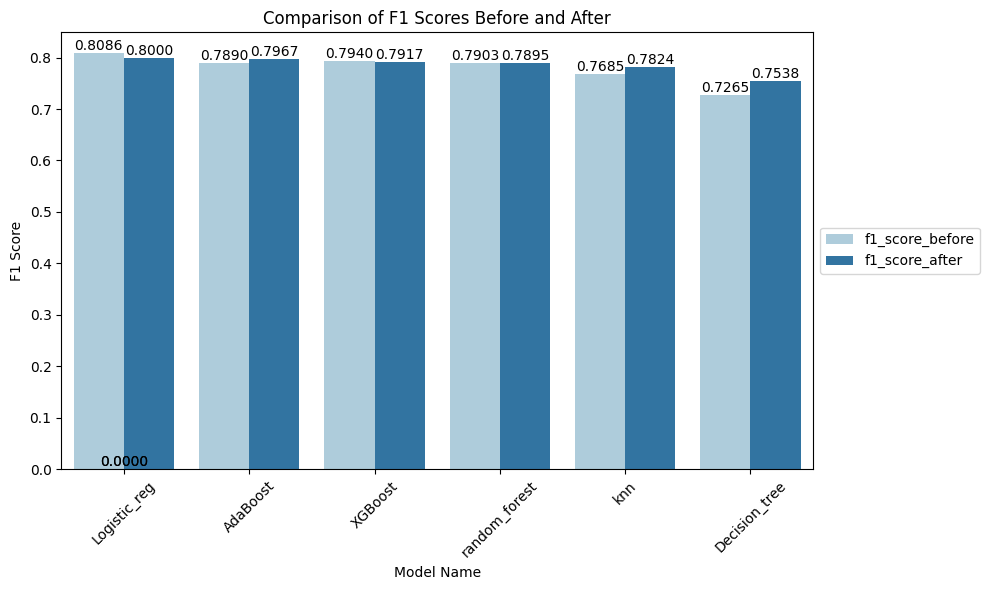

In [64]:
# Melt the DataFrame to combine f1_score_before and f1_score_after into a single column
metric_melted = metric_before_after_tuning_models.melt(id_vars='model_name', var_name='score_type', value_name='f1_score')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the combined data
ax = sns.barplot(data=metric_melted, x='model_name', y='f1_score', hue='score_type', palette = 'Paired')
plt.title('Comparison of F1 Scores Before and After')
plt.xlabel('Model Name')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)

# Annotate the values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
    
# Move legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

#### Observations
After hyperparameter tuning Logistic regresion is still the best performing model although we see that the f1 score value reduced from 0.80 to 0.79 but it still out performs all other models

In [65]:
best_model_name = df_models['model_name'].iloc[0]
best_model = dict(best_models).get(best_model_name)
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat-encoder',
                                                                   OneH...andle_unknown='ignore'))]),
                                                  Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=100, max_iter=300, random_state=42))])

#### Feature importances visualizations

In [66]:


# Get the feature names after transformation
feature_columns = best_model.named_steps['preprocessor'].get_feature_names_out()

# Remove unwanted prefixes and get the last part
feature_columns = np.array([col.split('__')[-1] for col in feature_columns])

# Display the feature columns
pd.DataFrame(feature_columns).rename(columns={0:'feature_columns'})

,feature_columns
0,seniorcitizen
1,tenure
2,monthlycharges
3,totalcharges
4,gender_Female
5,gender_Male
6,partner_No
7,partner_Yes
8,dependents_No
9,dependents_Yes


In [67]:
# Access the coefficients since best model is logistic regression
coefficients = best_model.named_steps['classifier'].coef_[0]

coefficients_df = pd.DataFrame({'Feature': feature_columns, 'Coefficient': coefficients})

# Magnitude of impact
coefficients_df['Absolute Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df.sort_values(by="Absolute Coefficient", ascending=False, inplace=True)

coefficients_df

,Feature,Coefficient,Absolute Coefficient
16,internetservice_No,-2.915510,2.915510
15,internetservice_Fiber optic,2.693790,2.693790
2,monthlycharges,-2.432462,2.432462
1,tenure,-1.473133,1.473133
31,contract_Two year,-0.993552,0.993552
3,totalcharges,0.785510,0.785510
27,streamingmovies_No,-0.706724,0.706724
29,contract_Month-to-month,0.676166,0.676166
25,streamingtv_No,-0.634127,0.634127
10,phoneservice_No,-0.610933,0.610933


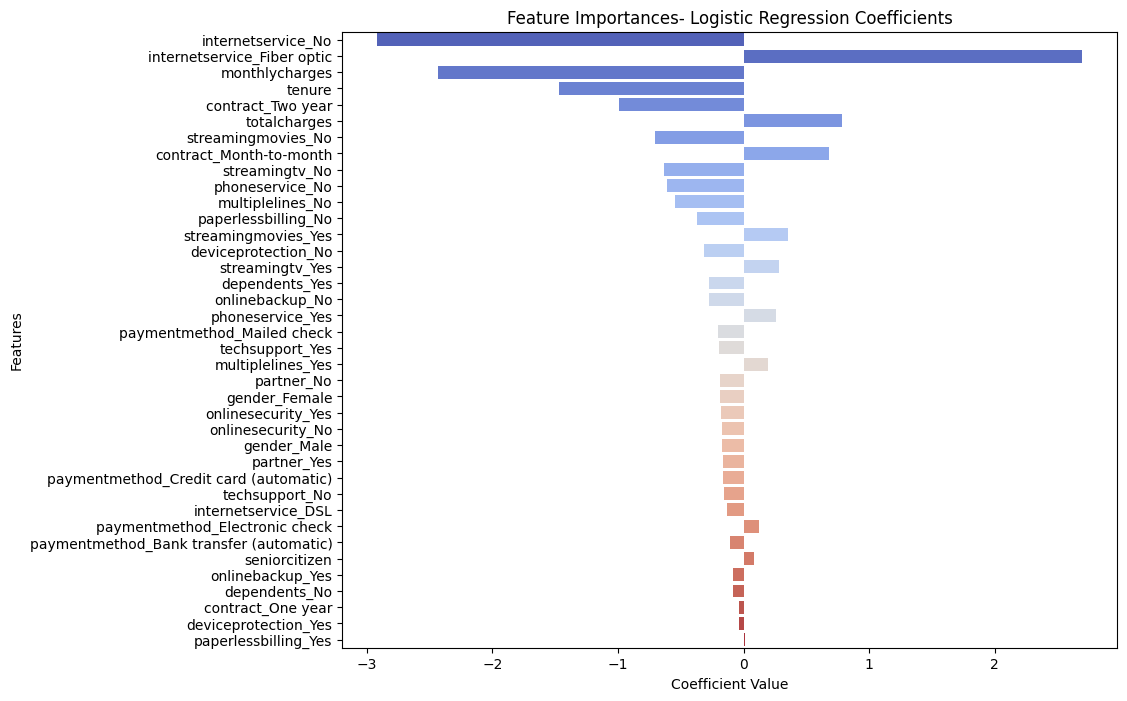

In [68]:
# Visualizing the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='coolwarm')
plt.title('Feature Importances- Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

### Understanding Feature Importances in Customer Behavior Prediction

#### Overview
We utilized the best model- logistic regression to identify the most influential factors predicting customer behavior in our dataset. The coefficients from the model, presented as "feature importances," indicate how each variable impacts the likelihood of customer actions (e.g., churn or not churn).

#### Key Findings

**1. Tenure**: 
- **Impact**: Most significant negative impact on the outcome (-1.026).
- **Interpretation**: Longer tenure reduces the likelihood of the predicted outcome, suggesting that longer-term customers are more stable.

**2. Contract Type**:
- **Month-to-month contracts**: Increases the likelihood of the outcome by 0.647, indicating higher volatility or turnover in short-term customers.
- **Two-year contracts**: Significant negative coefficient (-0.619), correlating with higher customer retention and stability.

**3. Internet Service**:
- **Fiber optic services**: More likely to exhibit the outcome (+0.526), potentially indicating higher expectations or different service experiences.
- **No internet service**: Negative coefficient (-0.472), reduces the likelihood, possibly due to reduced engagement with services.

**4. Billing and Payment Methods**:
- **Electronic checks**: Positive coefficient (+0.242), suggesting this payment method might be associated with more transient or less satisfied customer segments.
- **Automatic payments and mailed checks**: Show lesser significance but indicate different customer behavior patterns.

**5. Add-on Services**:
- Features like **online security**, **tech support**, and **streaming services** have varying impacts. The presence of these services generally increases or decreases the likelihood of the outcome, highlighting their influence on customer satisfaction and retention.

#### Implications and Recommendations

- **Customer Retention**: Strengthen retention strategies by enhancing service offerings for long-tenure customers, particularly those in stable contract setups like two-year agreements.
- **Service Improvement**: Investigate the high impact of fiber optic services on customer behavior, focusing on improving service quality or customer support for these users.
- **Payment Flexibility**: Consider promoting automatic payment methods which appear to associate with more stable customer behavior, potentially improving overall customer satisfaction and retention.
- **Targeted Marketing**: Adjust marketing strategies to address the specific needs of different customer segments, particularly focusing on those with month-to-month contracts or using electronic checks.

#### Evaluate the best model on the evaluation set

In [69]:
# predictig on the evaluation data using the best model
y_eval_pred = best_model.predict(X_eval)
print(f'Classification report of the best model- {best_model_name}\n\n{classification_report(y_true=y_eval_encoded, y_pred=y_eval_pred)}')

Classification report of the best model- Logistic_reg

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       742
           1       0.68      0.56      0.61       267

    accuracy                           0.81      1009
   macro avg       0.77      0.73      0.75      1009
weighted avg       0.81      0.81      0.81      1009



#### `Third Dataset`
Importing the third data set which is our test data

I obtained the third dataset from a OneDrive file, and I will use Pandas to import the Excel file into the notebook for analysis.

In [70]:
# Loading the second dataset into the notebook
test_df = pd.read_excel(r"Data/Telco-churn-last-2000.xlsx")

In [71]:
# Looking at the summary of the test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [72]:
# Dropping the customer id column
test_df.drop('customerID', axis=1, inplace =True)

In [73]:
# Changing the column titles to lower case
test_df.columns = test_df.columns.str.lower()

In [74]:
# Chaning the totalchrges column to numeric form
test_df['totalcharges'] = pd.to_numeric(test_df['totalcharges'], errors = 'coerce')

#### Using the Test Data to test our model and predict churn of customers

In [75]:
# predicting the churn on the test data
predicted_churn = best_model.predict(test_df)
predicted_churn

array([1, 1, 0, ..., 1, 0, 0])

In [76]:
# Create an array of corresponding labels
labels = np.array(['No', 'Yes']) # Index 0 is No, 1 is Yes
test_df['predicted_churn'] = labels[predicted_churn]

In [77]:
# Looking at the predicted churn column
test_df.head(2)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,predicted_churn
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,Yes


### Visualize the predicted churn

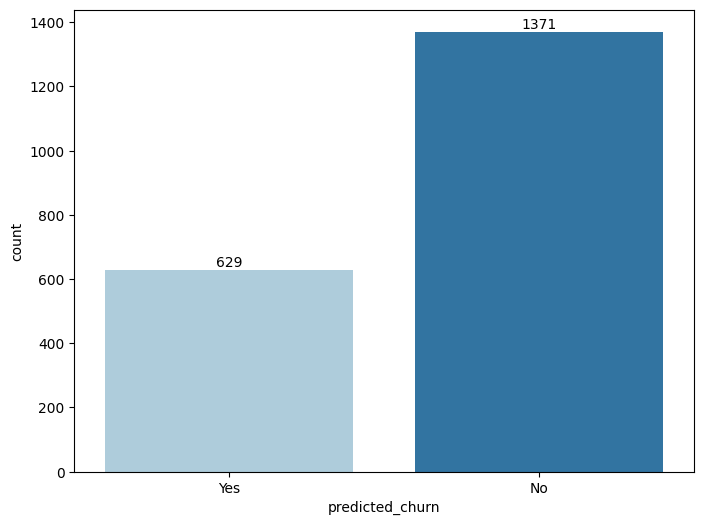

In [78]:
# Create the figure
plt.figure(figsize=(8, 6))

ax=sns.countplot(test_df, x='predicted_churn', palette = 'Paired')

# Add count values on top of each bar
for p in ax.patches:
    count = int(p.get_height())  # Convert count to integer
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

#### Persist/Saving the Model

In [79]:
import joblib

for model_name, pipeline in all_pipelines.items():
    joblib.dump(model_name,f'./Trained models/{model_name}.joblib')

    joblib.dump(encoder,f'./Trained models/encoder.joblib')

Conclusion

In conclusion, my exploration into predicting customer churn using machine learning models, particularly focusing on the Logistic Regression model, has revealed crucial insights into customer behavior in the telecom industry. The analysis of feature importances shed light on factors that significantly impact customer churn, providing actionable recommendations for businesses to enhance customer retention and satisfaction.

Made with 💖 [Adiru Valiant Ezabuku](https://github.com/valiantezabuku/A-Customer-Churn-Prediction)
<span style="color: #aaaaaa;">2024</span>